### Digit Recognition in Colab using MNIST dataset.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(tf.__version__)

2.8.0


In [65]:
(x_train, y_train), (x_test, y_test) = load_data()

print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [66]:
# print data sample to see if data is imported correctly
print(x_train[0])

# print sample image shape
print("\nshape: ", x_train[0].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [67]:
# normalize pixel values
x_train = x_train / 255
x_test = x_test / 255

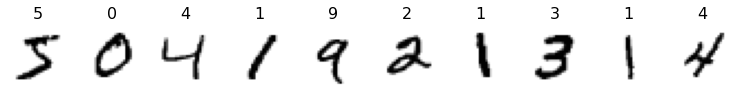

In [68]:
# display sample data
plt.figure(figsize=(13, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(x_train[i-1], cmap='gray_r')
  plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

# Model build

In [69]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model training

In [70]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2932 - accuracy: 0.9147
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9817
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0521 - accuracy: 0.9834
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.044

# Model evaluation

In [71]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0672 - accuracy: 0.9799 - 813ms/epoch - 3ms/step


[0.06724483519792557, 0.9799000024795532]

In [72]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.293188,0.914667
1,0.143036,0.957900
2,0.104248,0.968733
3,0.086645,0.972850
4,0.072987,0.977283
5,0.064093,0.979833
6,0.057043,0.981683
7,0.052142,0.983383
8,0.046356,0.984550
9,0.043966,0.985333


In [73]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

# Test model prediciton, display wrong predictions

In [90]:
predictions = model.predict(x_test)
prediction_classes = np.argmax(predictions, axis=1)
prediction_classes

predictions_compared = pd.concat([pd.DataFrame(y_test, columns=['Test data labels']), pd.DataFrame(prediction_classes, columns=['Predictions'])], axis=1)
predictions_compared.head(10)

,Test data labels,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [91]:
misclassified = predictions_compared[predictions_compared['Test data labels'] != predictions_compared['Predictions']]
misclassified.index[:10]

Int64Index([115, 149, 151, 247, 274, 321, 340, 381, 445, 582], dtype='int64')

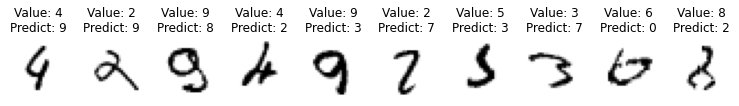

In [94]:
plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(x_test[j], cmap='gray_r')
  plt.title('Value: ' + str(y_test[j]) + '\n' + 'Predict: ' + str(prediction_classes[j]), color='black', fontsize=12)
plt.show()

# Save model

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
model.save('CodeLabsDigitRecognition.h5')